# Data Preprossessing:


Sample Dataset: [kaggle link](https://www.kaggle.com/datasets/atharvasoundankar/ai-developer-productivity-dataset/data)

In [2]:
import warnings, os, math
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split


warnings.filterwarnings('ignore')
%matplotlib inline

## Loading Dataset and Data Preprocessing:

In [3]:
data = pd.read_csv(os.path.join('dataset', 'data.csv'))
data.head(5)

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
hours_coding,500.0,5.01560,1.947253,0.0,3.6000,5.03,6.275,12.00
coffee_intake_mg,500.0,463.19200,142.334991,6.0,369.5000,500.50,600.000,600.00
distractions,500.0,2.97600,1.678409,0.0,2.0000,3.00,4.000,8.00
sleep_hours,500.0,6.97580,1.455965,3.0,6.1000,6.95,7.900,10.00
commits,500.0,4.60800,2.704990,0.0,3.0000,5.00,6.000,13.00
bugs_reported,500.0,0.85800,1.102846,0.0,0.0000,0.00,2.000,5.00
ai_usage_hours,500.0,1.51092,1.085557,0.0,0.6975,1.26,2.070,6.36
cognitive_load,500.0,4.49820,1.868861,1.0,3.1750,4.40,5.800,10.00
task_success,500.0,0.60600,0.489124,0.0,0.0000,1.00,1.000,1.00


In [20]:
# Checking for Null Values:
data.isnull().sum()

hours_coding        0
coffee_intake_mg    0
distractions        0
sleep_hours         0
commits             0
bugs_reported       0
ai_usage_hours      0
cognitive_load      0
task_success        0
dtype: int64

In [ ]:
data['task_success'].value_counts()

task_success
1    303
0    197
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x20a345606d0>,
 [Text(0, 0, 'fail'), Text(1, 0, 'success')])

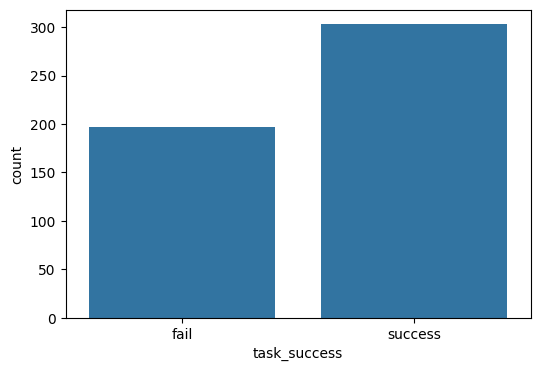

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(
    x = 'task_success',
    data = data,
    
    )
plt.xticks([0,1], ['fail', 'success'])


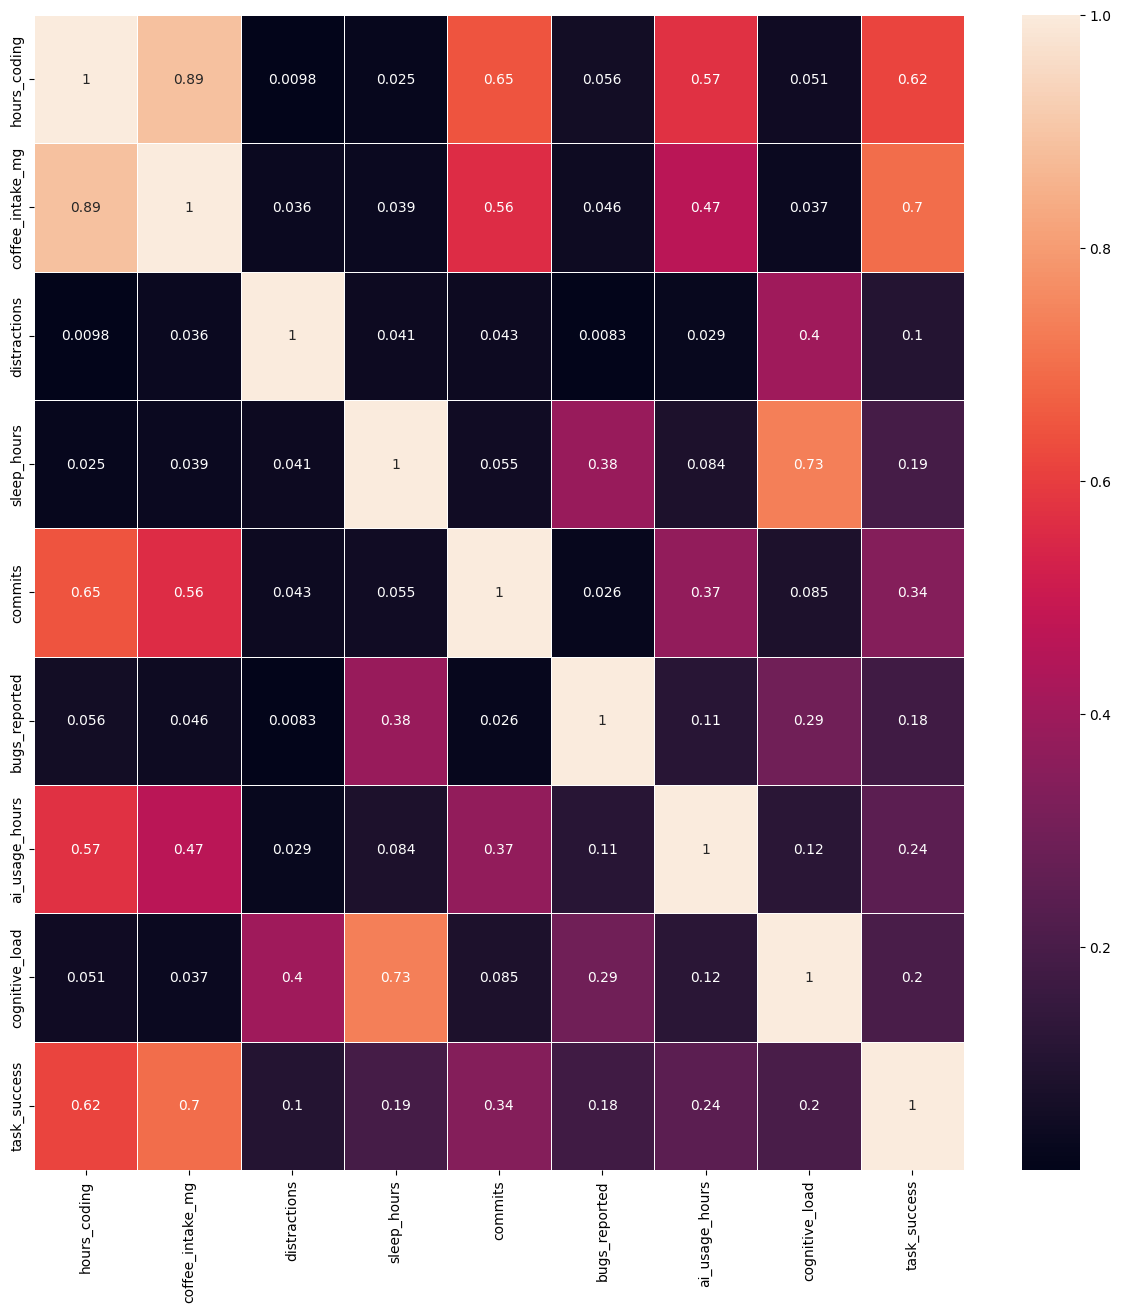

In [16]:
plt.figure(figsize=(15,15))
corr = data.corr().abs()
sns.heatmap(corr, annot=True, linewidth=.5)
plt.show()

In [18]:
# correlating whole data with the output:
data.corrwith(
    data['task_success']
).abs().sort_values(
    ascending=False
)

# Here every features are greater than 0.1 value so it is not good to remove any of the given feature...

task_success        1.000000
coffee_intake_mg    0.695185
hours_coding        0.615528
commits             0.338944
ai_usage_hours      0.241668
cognitive_load      0.199840
sleep_hours         0.186662
bugs_reported       0.178226
distractions        0.104303
dtype: float64

### Separating inputs and outputs:

In [21]:
X = data.drop('task_success', axis=1)
y = data['task_success']

### Standardizing the data:

In [24]:
scaler = StandardScaler()

X = scaler.fit_transform(X)
X[:5]

array([[ 0.50089835,  0.96213175, -1.17848421, -0.80838316, -0.9651097 ,
         0.12888677, -0.738535  ,  0.48302312],
       [-0.15195562,  0.73708485, -0.58208532, -0.05211383,  0.1450625 ,
         1.94419338,  0.22045766,  0.10808834],
       [ 0.6602564 ,  0.68082313, -1.17848421,  1.3229213 , -0.9651097 ,
        -0.77876654,  0.69995399, -1.23096445],
       [ 1.55985833,  0.96213175,  2.39990913, -0.46462437,  1.6252921 ,
         3.75949999, -0.10228026,  0.75083368],
       [-0.24962668, -0.29672433,  1.80351024, -0.05211383, -0.2249949 ,
        -0.77876654, -0.23137542,  0.96508213]])

### Splitting Train and Test Data:

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    random_state=101,
    shuffle=True
)

#### Now, we can import the related model and feed the data to it...